# **Sentiment Analysis on Tweets**
Sentiment analysis, also known as opinion mining, is the process of identifying and categorizing emotions expressed in text data—typically as positive, negative, or neutral. It helps organizations and individuals understand the sentiment behind user-generated content, such as product reviews, social media posts, or customer feedback.

In the context of social media, sentiment analysis is particularly valuable due to the vast amount of real-time user opinions shared daily. Twitter, with its concise and public messages, provides an ideal dataset for analyzing public sentiment around topics, events, brands, or products.

By leveraging natural language processing (NLP) techniques and machine learning models, sentiment analysis can extract insights from tweets to support business decisions, brand monitoring, political analysis, and crisis management.

This project focuses on building a sentiment classifier using a dataset of tweets. The model aims to classify each tweet as positive or negative, helping reveal how people feel about certain topics at scale.

<br>

**Dataset:** [Kaggle Sentiment140](https://www.kaggle.com/datasets/kazanova/sentiment140/data)

---

## **Exploratory Data Analysis**

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Prepare the dataset.  
Added column/feature names.

In [33]:
dataset_path = '../data/twt.csv'
column_names = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
twt_df = pd.read_csv(dataset_path, encoding='latin', delimiter=',', names=column_names)
twt_df.head()

,sentiment,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [34]:
print('dataframe shape:', twt_df.shape, '\n')
print(twt_df.info())
print('\nMissing values:\n', twt_df.isnull().sum())
print('\nDuplicate rows:', twt_df.duplicated().sum())

print('Number of unique values:', twt_df['sentiment'].nunique())
print('Unique values:', twt_df['sentiment'].unique())

dataframe shape: (1600000, 6) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   id         1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB
None

Missing values:
 sentiment    0
id           0
date         0
flag         0
user         0
text         0
dtype: int64

Duplicate rows: 0
Number of unique values: 2
Unique values: [0 4]


Replace 4 with 1 in the `sentiment` column.

In [35]:
twt_df['sentiment'] = twt_df['sentiment'].replace(4, 1) 

Visualize the distribution of sentiments.

Text(0.5, 1.0, 'Data distribution')

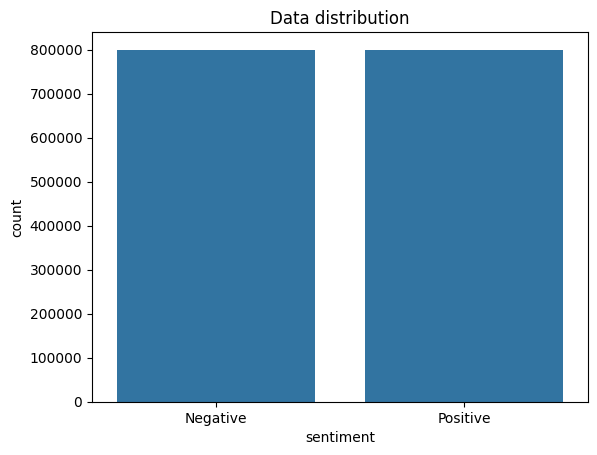

In [36]:
value_counts = twt_df['sentiment'].value_counts().reset_index()
value_counts = value_counts.replace({0:'Negative', 1:'Positive'})

sns.barplot(data=value_counts, x='sentiment', y='count').set_title('Data distribution')

Visualize the distribution of tweet lengths in terms of character count.

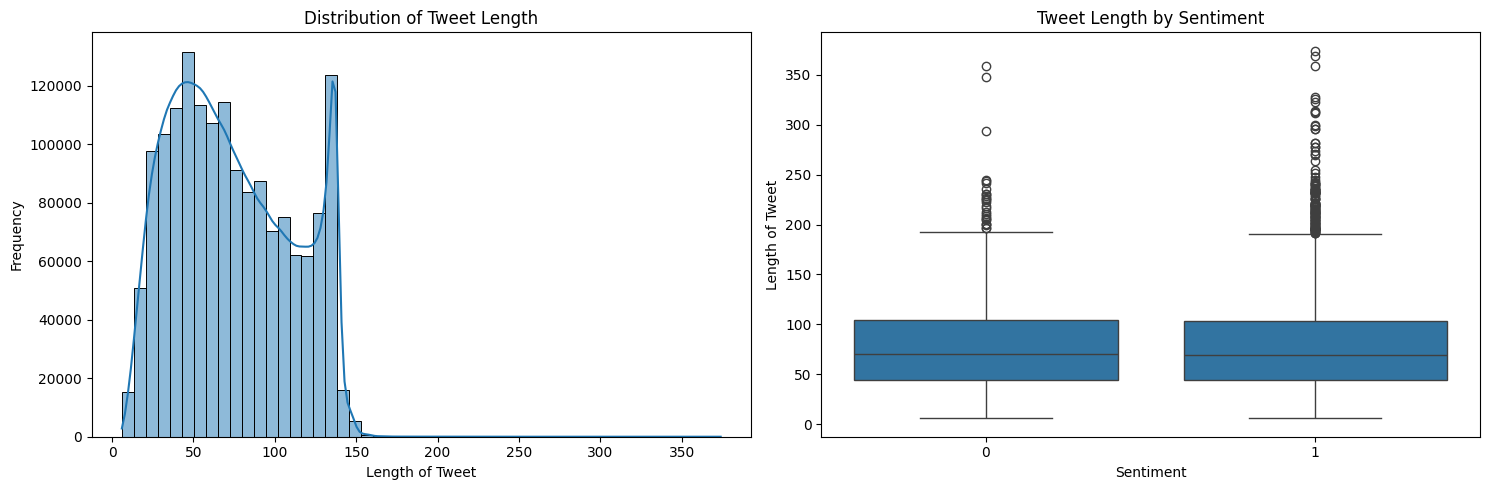

In [48]:
twt_df['text_len'] = twt_df['text'].apply(len)

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(twt_df['text_len'], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Tweet Length")
ax[0].set_xlabel("Length of Tweet")
ax[0].set_ylabel("Frequency")

sns.boxplot(x='sentiment', y='text_len', data=twt_df, ax=ax[1])
ax[1].set_title("Tweet Length by Sentiment")
ax[1].set_xlabel("Sentiment")
ax[1].set_ylabel("Length of Tweet")

plt.tight_layout()
plt.show()

Visualize the distribution of tweet lengths in terms word count.

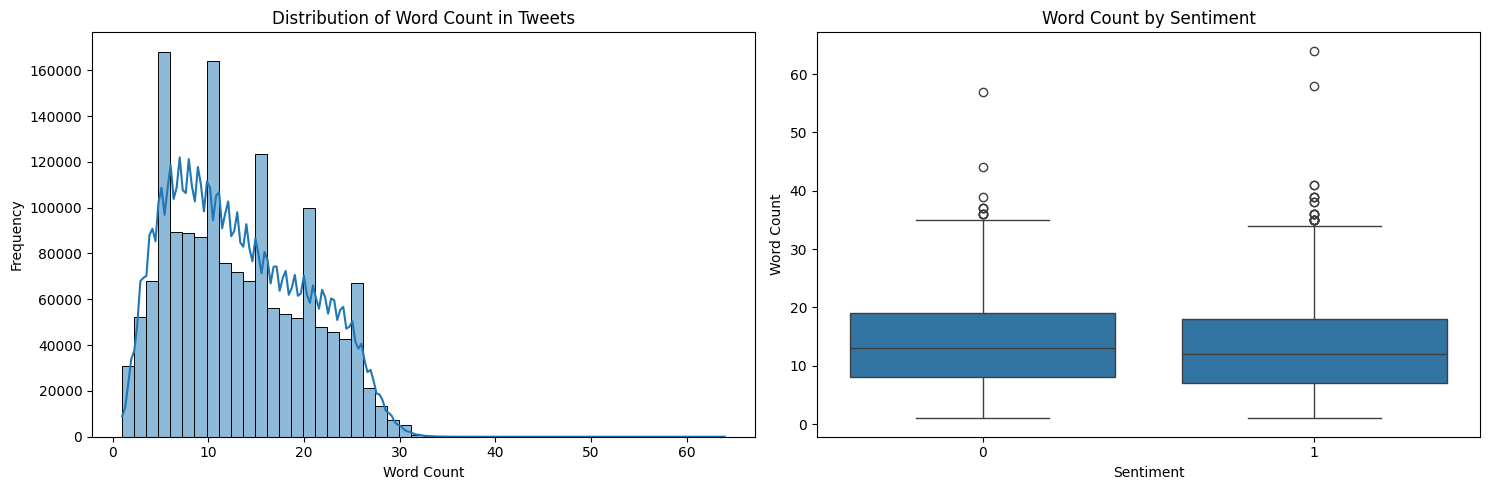

In [49]:
twt_df['word_count'] = twt_df['text'].apply(lambda x: len(x.split()))

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(twt_df['word_count'], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Word Count in Tweets")
ax[0].set_xlabel("Word Count")
ax[0].set_ylabel("Frequency")

sns.boxplot(x='sentiment', y='word_count', data=twt_df, ax=ax[1])
ax[1].set_title("Word Count by Sentiment")
ax[1].set_xlabel("Sentiment")
ax[1].set_ylabel("Word Count")

plt.tight_layout()
plt.show()